<a href="https://colab.research.google.com/github/data-science-and-machine-learning/MNIST-tensorflow-and-keras/blob/master/my_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, colors=['b']):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch')
    ax.set_ylabel('Categorical Crossentropy Loss')
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Data Preprocessing


In [0]:
# convert into 1 dimentional matrix
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# normalise x_train 
# X => (X - Xmin)/(Xmax-Xmin) = X/255
x_train = x_train/255
x_test = x_test/255

In [0]:
# convert labels into catagorical format(one-hot encoding)
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

Neural Network Modeling

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import initializers

def three_layer_nn(input_dim= 784,\
                   neurons= [512, 256, 10],\
                   dropouts= [0.5, 0.2],\
                   activations= ['relu', 'relu', 'relu']):
  
  print('Evaluatiing following neural network:')
  print('| Dense:', neurons[0], '| Batch Normalization |', 'Dropout' ,dropouts[0],\
        '| Dense:', neurons[1], '| Batch Normalization |', 'Dropout' ,dropouts[1],\
        '| Dense:', neurons[2], '|')


  # Initializing a sequential model
  m= Sequential()
  # Adding 1st layer with he- normal initializer and relu activation function
  m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
  # Adding a batch normalization model
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[0]))
  # Adding 2nd layer relu activation function
  m.add(Dense(neurons[1], activation=activations[1]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[1]))

  # finally adding the output layer
  m.add(Dense(neurons[2], activation=activations[2]))
  
  # compiling the stack
  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return m


In [0]:
def four_layer_nn(input_dim= 784,\
                   neurons= [512, 256, 128, 10],\
                   dropouts= [0.5, 0.2, 0.2],\
                   activations= ['relu', 'relu', 'relu', 'relu']):

  print('Evaluatiing following neural network:')
  print('| Dense:', neurons[0], '| Batch Normalization |', 'Dropout' ,dropouts[0],\
        '| Dense:', neurons[1], '| Batch Normalization |', 'Dropout' ,dropouts[1],\
        '| Dense:', neurons[2], '| Batch Normalization |', 'Dropout' ,dropouts[2],\
        '| Dense:', neurons[3], '|')
  
  # Initializing a sequential model
  m= Sequential()
  
  # Adding 1st layer with he- normal initializer and relu activation function
  m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
  # Adding a batch normalization model
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[0]))
  
  # Adding 2nd layer activation function
  m.add(Dense(neurons[1], activation=activations[1]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[1]))
  
  # Adding 3rd layer activation function
  m.add(Dense(neurons[2], activation=activations[2]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[2]))


  # finally adding the output layer
  m.add(Dense(neurons[3], activation=activations[3]))
  # compiling the stack
  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  return m

In [0]:
def five_layer_nn(input_dim= 784,\
                   neurons= [512, 256, 128, 64, 10],\
                   dropouts= [0.5, 0.4, 0.3, 0.2],\
                   activations= ['relu', 'relu', 'relu', 'relu', 'relu']):
  
  print('Evaluatiing following neural network:')
  print('| Dense:', neurons[0], '| Batch Normalization |', 'Dropout' ,dropouts[0],\
        '| Dense:', neurons[1], '| Batch Normalization |', 'Dropout' ,dropouts[1],\
        '| Dense:', neurons[2], '| Batch Normalization |', 'Dropout' ,dropouts[2],\
        '| Dense:', neurons[3], '| Batch Normalization |', 'Dropout' ,dropouts[3],\
        '| Dense:', neurons[4], '|')

  # Initializing a sequential model
  m= Sequential()
  
  # Adding 1st layer with he- normal initializer and relu activation function
  m.add(Dense(neurons[0], input_dim=input_dim, kernel_initializer= initializers.he_normal(seed=None), activation=activations[0]))
  # Adding a batch normalization model
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[0]))
  
  # Adding 2nd layer activation function
  m.add(Dense(neurons[1], activation=activations[1]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[1]))
  
  # Adding 3rd layer activation function
  m.add(Dense(neurons[2], activation=activations[2]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[2]))
  
  # Adding 4th layer activation function
  m.add(Dense(neurons[3], activation=activations[3]))
  # Adding batch normalization layer
  m.add(BatchNormalization())
  # adding a dropout
  m.add(Dropout(dropouts[3]))


  # finally adding the output layer
  m.add(Dense(neurons[4], activation=activations[4]))
  # compiling the stack
  m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return m


MLP with 3 layer network

In [0]:
num_classes= 64
output_dimentions= 10
dimentions= x_train.shape[1]
#input_dim, neurons, dropouts, activations
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit

model = KerasClassifier(build_fn=three_layer_nn, epochs=20, verbose=0)

dimentions_list= [dimentions]
dropouts= [[0.5, 0.2]]
batch = [32, 64, 128]

neurons_list= [[num_classes*4, num_classes*2, output_dimentions],
               [num_classes*2, num_classes*1, output_dimentions]]
activations_list= [['relu', 'relu', 'relu'],
                   ['relu', 'relu', 'sigmoid'],
                   ['relu', 'relu', 'softmax']]

param_grid = dict(#input_dim= dimentions_list,\
                  #dropouts= dropouts,\
                  neurons= neurons_list,\
                  batch_size=batch,\
                  activations= activations_list
                  )

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2, return_train_score=True, verbose= 1)
grid_result_3layers= grid.fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 128 | Batch Normalization | Dropout 0.5 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 128 | Batch Normalization | Dropout 0.5 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 128 | Batch Normalization | Dropout 0.5 | Dense: 64 | B

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 68.6min finished


Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |


In [0]:
print("Best: %f using %s" % (grid_result_3layers.best_score_, grid_result_3layers.best_params_))
print("Best estimator: ", grid_result_3layers.best_estimator_)

means_test = grid_result_3layers.cv_results_['mean_test_score']
means_train = grid_result_3layers.cv_results_['mean_train_score']
stds_test = grid_result_3layers.cv_results_['std_test_score']
stds_train = grid_result_3layers.cv_results_['std_train_score']
params = grid_result_3layers.cv_results_['params']

for mean, mean_train, stdev, param in zip(means_test, means_train, stds_test, params):
    print("%f %f (%f) with: %r" % (mean, mean_train, stdev, param))

Best: 0.975717 using {'activations': ['relu', 'relu', 'softmax'], 'batch_size': 32, 'neurons': [256, 128, 10]}
Best estimator:  <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8e8fa53c50>
0.944050 0.953683 (0.008083) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [256, 128, 10]}
0.935117 0.942683 (0.002683) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [128, 64, 10]}
0.898700 0.907667 (0.024233) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [256, 128, 10]}
0.921417 0.928383 (0.000583) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [128, 64, 10]}
0.930433 0.938950 (0.004933) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [256, 128, 10]}
0.913917 0.919300 (0.004317) with: {'activations': ['relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [128, 64, 10]}
0.974850 0.993367 (0.000917) with: {'activations': ['relu', 'relu', 's

18


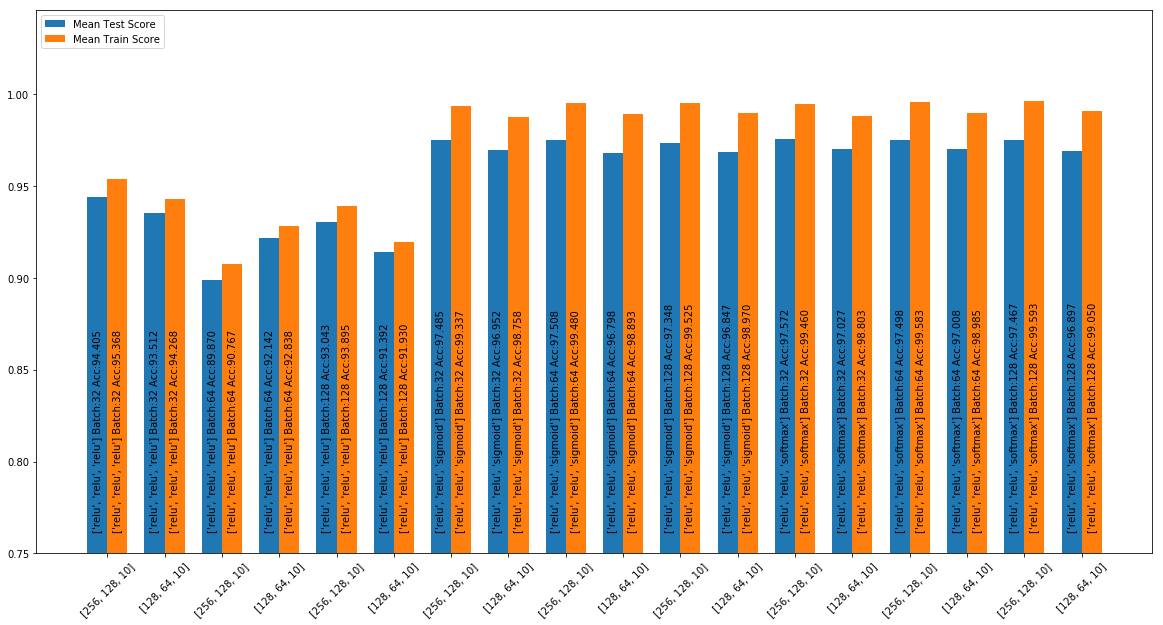

In [0]:
# comparision chart
fig, ax = plt.subplots(figsize=(20,10))

ind= np.arange(len(params))
width= 0.35
print(len(params))

rects1 = ax.bar(ind - width/2, means_test, width, 
                label='Mean Test Score')
rects2 = ax.bar(ind + width/2, means_train, width, 
                label='Mean Train Score')

ax.set_xticks(ind)
ax.set_xticklabels([param['neurons'] for param in params], rotation=45)
batches= [param['batch_size'] for param in params]
activators= [param['activations'] for param in params]

i= 0
for rect in rects1:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_test[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom',
                horizontalalignment='center', verticalalignment='center_baseline')
    i+=1
i=0
for rect in rects2:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_train[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom')
    i+=1
ax.set_ylim(bottom=0.75)
ax.legend(loc= 'upper left')



MLP with 4 layer network

In [0]:
num_classes= 64
output_dimentions= 10
dimentions= x_train.shape[1]
#input_dim, neurons, dropouts, activations
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=four_layer_nn, epochs=20, verbose=0)

batch = [32, 64, 128]
#dropouts= [[0.5, 0.3, 0.2],\
#           [0.2, 0.3, 0.5]]
#dimentions_list= [dimentions]
neurons_list= [[num_classes*8, num_classes*4, num_classes*2, output_dimentions],
               [num_classes*4, num_classes*2, num_classes*1, output_dimentions]]
activations_list= [['relu', 'relu', 'relu', 'relu'],
                   ['relu', 'relu', 'relu', 'sigmoid'],
                   ['relu', 'relu', 'relu', 'sigmoid']]

param_grid = dict(neurons= neurons_list,\
                  batch_size= batch,\
                  activations= activations_list)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2,  return_train_score= True, verbose= 1)
grid_result_4layers = grid.fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 256 | Batch Normalization | Dropout 0.5 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluat

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 101.5min finished


Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.2 | Dense: 128 | Batch Normalization | Dropout 0.2 | Dense: 10 |


In [0]:
print("Best: %f using %s" % (grid_result_4layers.best_score_, grid_result_4layers.best_params_))
print("Best estimator: ", grid_result_3layers.best_estimator_)
means_test = grid_result_3layers.cv_results_['mean_test_score']
means_train = grid_result_3layers.cv_results_['mean_train_score']
stds = grid_result_4layers.cv_results_['std_test_score']
params = grid_result_4layers.cv_results_['params']
for mean, mean_train, stdev, param in zip(means_test, means_train, stds, params):
    print("%f, %f (%f) with: %r" % (mean, mean_train, stdev, param))

Best: 0.978117 using {'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 64, 'neurons': [512, 256, 128, 10]}
Best estimator:  <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8e8fa53c50>
0.944050, 0.953683 (0.000250) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [512, 256, 128, 10]}
0.935117, 0.942683 (0.003550) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [256, 128, 64, 10]}
0.898700, 0.907667 (0.002183) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [512, 256, 128, 10]}
0.921417, 0.928383 (0.008433) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [256, 128, 64, 10]}
0.930433, 0.938950 (0.047467) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [512, 256, 128, 10]}
0.913917, 0.919300 (0.008667) with: {'activations': ['relu', 'relu', 'relu', 'relu'], 'batch_size': 128, 'neu

18


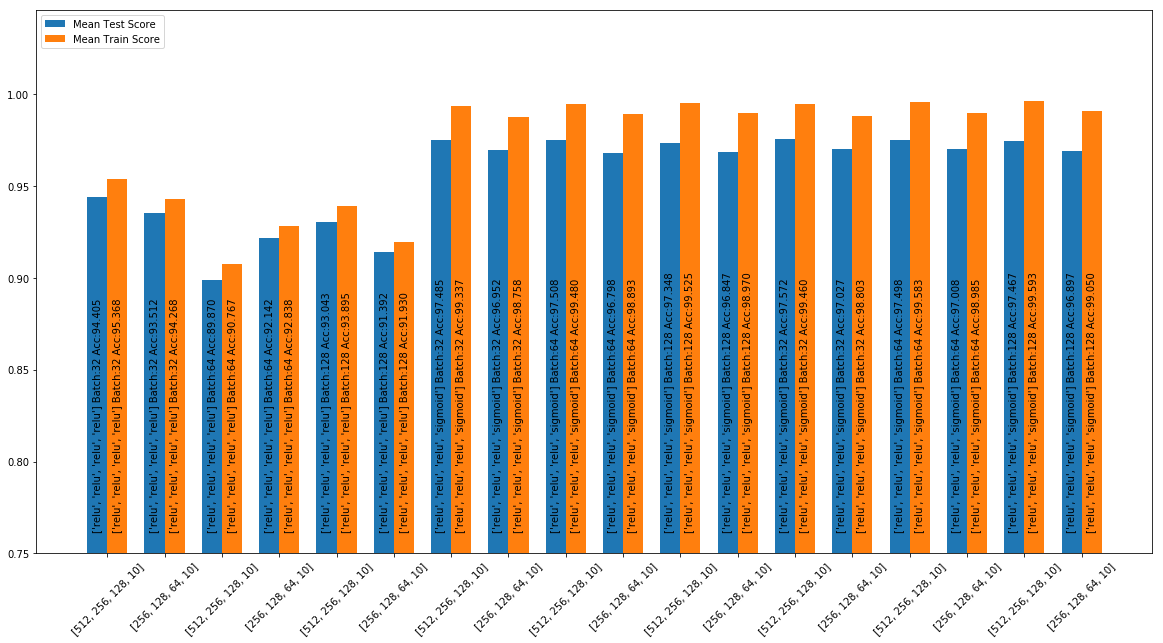

In [0]:
# comparision chart
fig, ax = plt.subplots(figsize=(20,10))

ind= np.arange(len(params))
width= 0.35
print(len(params))

rects1 = ax.bar(ind - width/2, means_test, width, 
                label='Mean Test Score')
rects2 = ax.bar(ind + width/2, means_train, width, 
                label='Mean Train Score')

ax.set_xticks(ind)
ax.set_xticklabels([param['neurons'] for param in params], rotation=45)
batches= [param['batch_size'] for param in params]
activators= [param['activations'] for param in params]

i= 0
for rect in rects1:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_test[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom',
                horizontalalignment='center', verticalalignment='center_baseline')
    i+=1
i=0
for rect in rects2:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_train[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom')
    i+=1
ax.set_ylim(bottom=0.75)
ax.legend(loc= 'upper left')



MLP with 5 layer network

In [0]:
num_classes= 64
output_dimentions= 10
dimentions= x_train.shape[1]

#input_dim, neurons, dropouts, activations
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=five_layer_nn, epochs=20, verbose=0)

batch = [32, 64, 128]
#dropouts= [[0.5, 0.3, 0.2, 0.2],\
#           [0.2, 0.3, 0.4, 0.5]]
dimentions_list= [dimentions]
neurons_list= [[num_classes*8, num_classes*4, num_classes*2, num_classes, output_dimentions]]
activations_list= [['relu', 'relu', 'relu', 'relu', 'relu'],
                   ['relu', 'relu', 'relu', 'relu', 'sigmoid'],
                   ['relu', 'relu', 'relu', 'relu', 'softmax']]

param_grid = dict(neurons= neurons_list,\
                  batch_size= batch,\
                  activations= activations_list)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 2, return_train_score= True, verbose= 1)
grid_result_5layers = grid.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.4 | Dense: 128 | Batch Normalization | Dropout 0.3 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.4 | Dense: 128 | Batch Normalization | Dropout 0.3 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.4 | Dense: 128 | Batch Normalization | Dropout 0.3 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.4 | Dense: 128 | Batch Normalization | Dropout 0.3 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.4 | Dense: 128 | Batch Normalization | Dropout 0.3 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |
Evaluatiing 

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 69.3min finished


Evaluatiing following neural network:
| Dense: 512 | Batch Normalization | Dropout 0.5 | Dense: 256 | Batch Normalization | Dropout 0.4 | Dense: 128 | Batch Normalization | Dropout 0.3 | Dense: 64 | Batch Normalization | Dropout 0.2 | Dense: 10 |


In [0]:
print("Best: %f using %s" % (grid_result_5layers.best_score_, grid_result_5layers.best_params_))
print("Best estimator: ", grid_result_3layers.best_estimator_)
means_test = grid_result_5layers.cv_results_['mean_test_score']
means_train = grid_result_5layers.cv_results_['mean_train_score']
stds = grid_result_5layers.cv_results_['std_test_score']
params = grid_result_5layers.cv_results_['params']
for mean, stdev, param in zip(means_test, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977033 using {'activations': ['relu', 'relu', 'relu', 'relu', 'softmax'], 'batch_size': 64, 'neurons': [512, 256, 128, 64, 10]}
Best estimator:  <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8e8fa53c50>
0.910933 (0.020933) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'relu'], 'batch_size': 32, 'neurons': [512, 256, 128, 64, 10]}
0.940983 (0.001350) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'relu'], 'batch_size': 64, 'neurons': [512, 256, 128, 64, 10]}
0.872450 (0.000683) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'relu'], 'batch_size': 128, 'neurons': [512, 256, 128, 64, 10]}
0.976250 (0.000150) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 32, 'neurons': [512, 256, 128, 64, 10]}
0.976817 (0.001883) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'sigmoid'], 'batch_size': 64, 'neurons': [512, 256, 128, 64, 10]}
0.975867 (0.000533) with: {'activations': ['relu', 'relu', 'relu', 'relu', 'sig

9
9
9


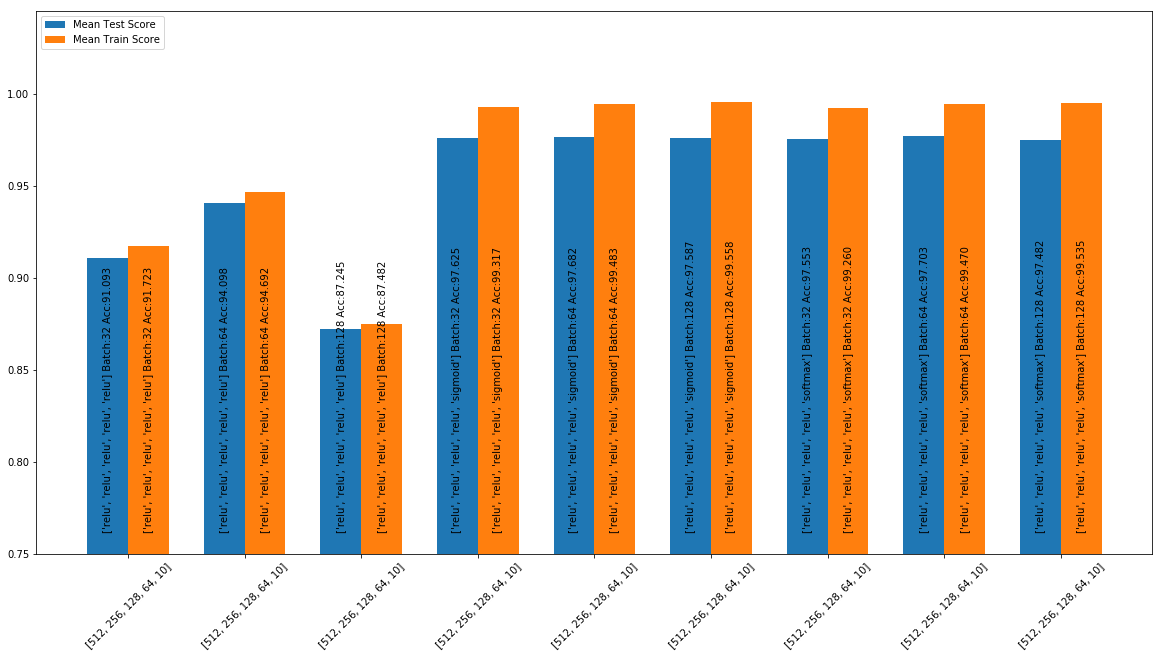

In [0]:
# comparision chart
fig, ax = plt.subplots(figsize=(20,10))

ind= np.arange(len(params))
width= 0.35
print(len(params))
print(len(means_test))
print(len(means_train))
rects1 = ax.bar(ind - width/2, means_test, width, label='Mean Test Score')
rects2 = ax.bar(ind + width/2, means_train, width, label='Mean Train Score')

ax.set_xticks(ind)
ax.set_xticklabels([param['neurons'] for param in params], rotation=45)
batches= [param['batch_size'] for param in params]
activators= [param['activations'] for param in params]

i= 0
for rect in rects1:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_test[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom',
                horizontalalignment='center', verticalalignment='center_baseline')
    i+=1
i=0
for rect in rects2:
    ax.annotate('{} Batch:{} Acc:{:.3f}'.format(activators[i], batches[i], means_train[i]*100), rotation=90,
                xy=(rect.get_x() + rect.get_width() / 2, 0.76),
                xytext=(0, 3),  # use 3 points offset
                textcoords="offset points",  # in both directions
                ha='center', va='bottom')
    i+=1
ax.set_ylim(bottom=0.75)
ax.legend(loc= 'upper left')


In [0]:
import pickle
with open('3nn_results.pickle', 'wb') as handle:
    pickle.dump(grid_result_3layers, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('4nn_results.pickle', 'wb') as handle:
    pickle.dump(grid_result_4layers, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('5nn_results.pickle', 'wb') as handle:
    pickle.dump(grid_result_5layers, handle, protocol=pickle.HIGHEST_PROTOCOL)
